# Chapter 8 Segmentation

Segmentation is the process of separating an image into multiple logical
regions. The regions can be defined as pixels sharing similar characteristics
such as intensity, texture, etc. There are many methods of segmentation.
They can be classified as follows:
- Histogram-based segmentation
- Region-based segmentation
- Edge segmentation
- Differential equation-based methods
- Contour methods
- Graph partitioning methods
- Model based segmentation
- Clustering methods, etc

## Histogram-Based Segmentation
In the histogram-based method (Figure Below), a threshold is determined by
using the histogram of the image. Each pixel in the image is compared with
the threshold value. If the pixel intensity is less than the threshold value, then
the corresponding pixel in the segmented image is assigned a value of zero.

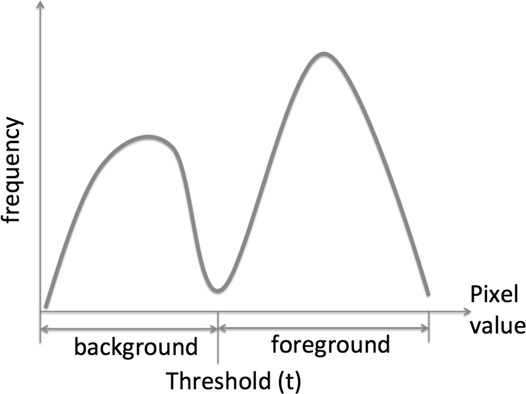

In [1]:
from IPython.display import Image 
Image("../Figures/Treshold.png")

### Otsu’s Method

Otsu’s method [Ots79] works best if the histogram of the image is bimodal, but can be applied to other histograms as well.

<ipython-input-2-787158391ec9>:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (768, 1024, 3) looks like an RGB image
  thresh = threshold_otsu(a)


Text(0.5, 1.0, 'output for 100')

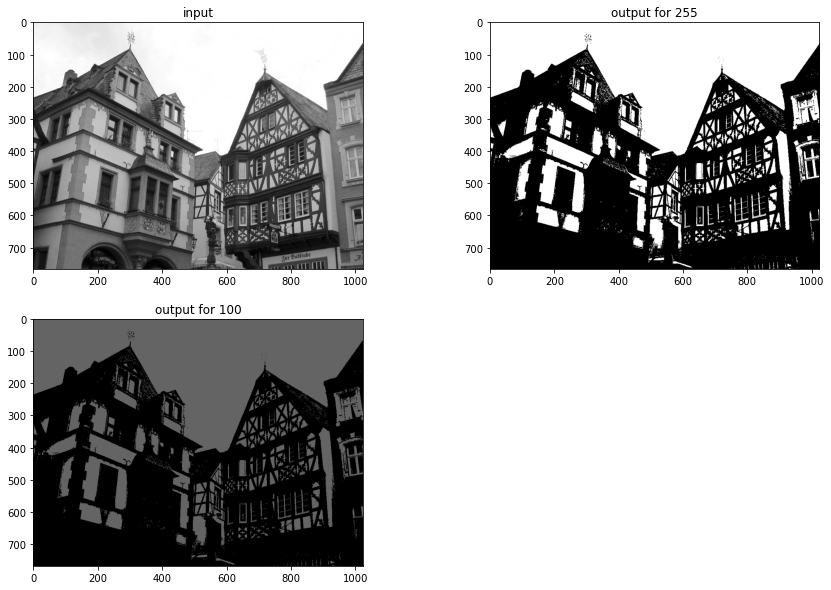

In [2]:
import cv2
import numpy
import matplotlib.pyplot as plt
from PIL import Image
from skimage.filters.thresholding import threshold_otsu
# Opening the image and converting it to grayscale
a = Image.open('../Figures/City.png')
a = numpy.asarray(a)
thresh = threshold_otsu(a)
# Pixels with intensity greater than the
# "threshold" are kept.
b = 255*(a > thresh)
b2 = 100*(a > thresh)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(a)
ax1.set_title('input')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(b)
ax2.set_title('output for 255')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(b2)
ax3.set_title('output for 100')

### Renyi Entropy

Renyi entropy-based segmentation is very useful when the object of
interest is small compared to the whole image i.e., the threshold is at the
right tail of the histogram.

The renyi threshold is:  114


Text(0.5, 1.0, 'output for 100')

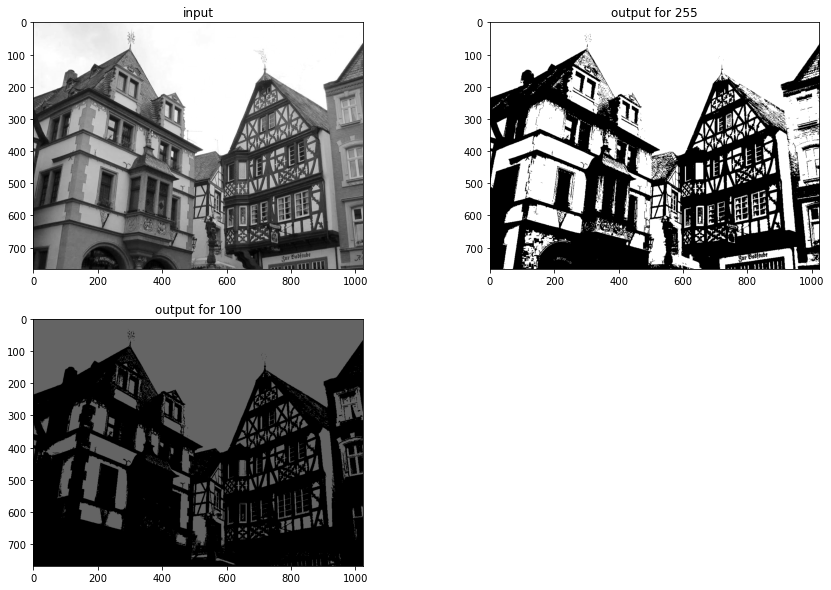

In [3]:
import cv2
from PIL import Image
import numpy as np
import skimage.exposure as imexp
import matplotlib.pyplot as plt

# Defining function
def renyi_seg_fn(im, alpha):
    hist, _ = imexp.histogram(im)
    # Convert all values to float
    hist_float = np.array([float(i) for i in hist])
    # compute the pdf
    pdf = hist_float/np.sum(hist_float)
    # compute the cdf
    cumsum_pdf = np.cumsum(pdf)
    s, e = im.min(), im.max()
    scalar = 1.0/(1.0-alpha)
    # A very small value to prevent error due to log(0).
    eps = np.spacing(1)
    
    rr = e-s
    # The inner parentheses is needed because
    # the parameters are tuple.
    h1 = np.zeros((rr, 1))
    h2 = np.zeros((rr, 1))
    # The following loop computes h1 and h2
    # values used to compute the entropy.
    for ii in range(1, rr):
        iidash = ii+s
        temp0 = pdf[0:iidash]/(cumsum_pdf[iidash])
        temp1 = np.power(temp0, alpha)
        h1[ii] = np.log(np.sum(temp1)+eps)
        temp0 = pdf[iidash+1:e]/(1.0-cumsum_pdf[iidash])
        temp2 = np.power(temp0, alpha)
        h2[ii] = np.log(np.sum(temp2)+eps)
    T = h1+h2
    # Entropy value is calculated
    T = T*scalar
    T = T.reshape((rr, 1))[:-2]
    # location where the maximum entropy
    # occurs is the threshold for the renyi entropy
    thresh = T.argmax(axis=0)
    return thresh

# Main program
# Opening the image and converting it to grayscale.
a = Image.open('../Figures/City.png').convert('L')
a = np.array(a)
# Computing the threshold by calling the function.
thresh = renyi_seg_fn(a, 3)
print('The renyi threshold is: ', thresh[0])
b = 255*(a > thresh)
b1 = 100*(a > thresh)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(a,cmap='gray')
ax1.set_title('input')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(b,cmap='gray')
ax2.set_title('output for 255')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(b2)
ax3.set_title('output for 100')

### Adaptive Thresholding

Text(0.5, 1.0, 'output using Otsu method')

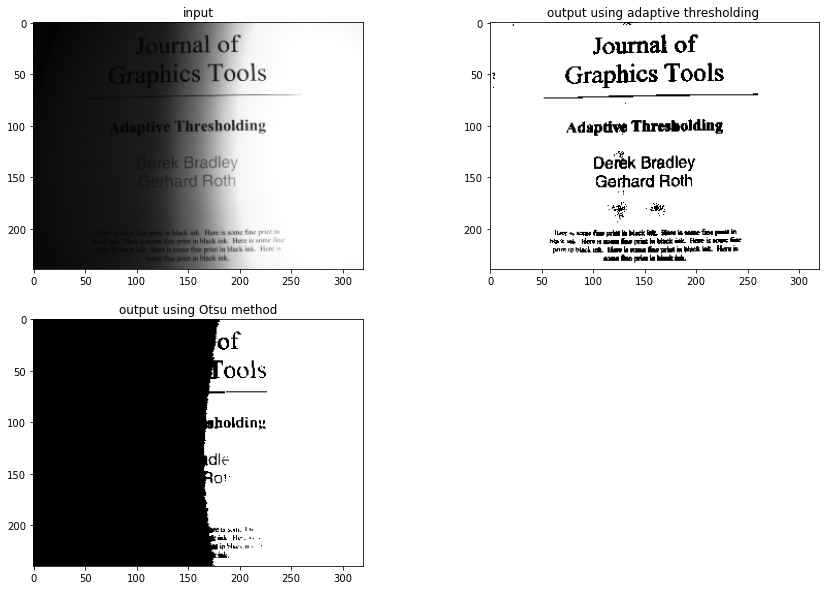

In [4]:
import cv2
import numpy
from PIL import Image
from skimage.filters import threshold_local
# Opening the image and converting it to grayscale.
a = Image.open('../Figures/text.png').convert('L')

a = numpy.asarray(a)
# Performing adaptive thresholding.
b = cv2.adaptiveThreshold(a,a.max(), cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,43,5)

a = numpy.asarray(a)
thresh = threshold_otsu(a)
# Pixels with intensity greater than the
# "threshold" are kept.
c = 100*(a > thresh)


fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(a,cmap='gray')
ax1.set_title('input')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(b,cmap='gray')
ax2.set_title('output using adaptive thresholding ')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(c,cmap='gray')
ax3.set_title('output using Otsu method')

# plt.title('im4')
# plt.imshow(a,cmap='gray')


### Watershed Segmentation

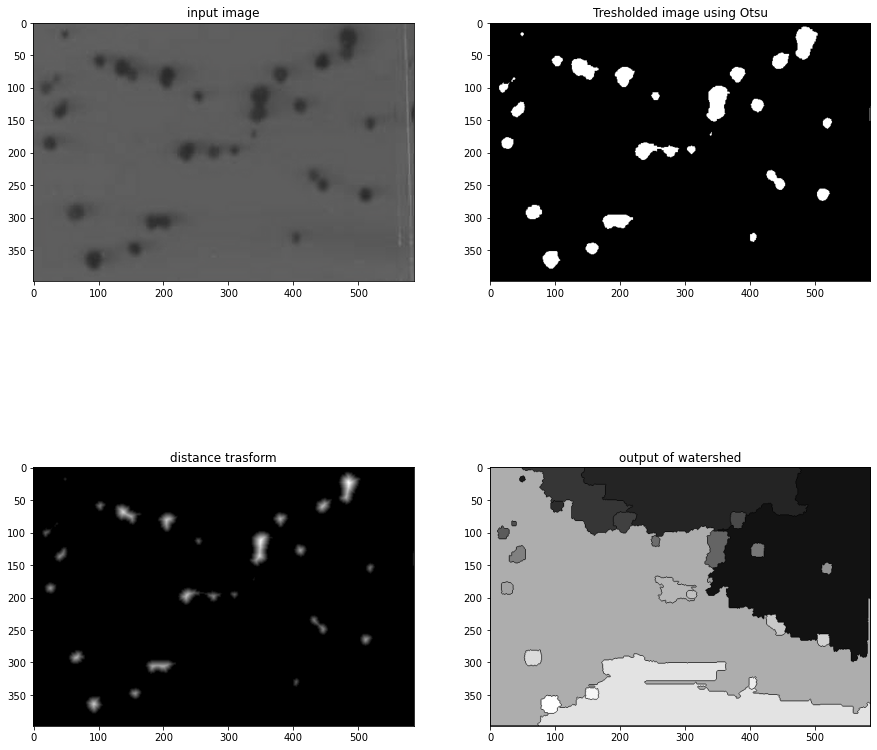

In [5]:
import cv2
from scipy.ndimage import label
# Opening the image.
a = cv2.imread('../Figures/cellimage.png')
# Converting to grayscale.
a1 = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Thresholding the image to obtain cell pixels.
thresh,b1 = cv2.threshold(a1, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# Since Otsu’s method has over segmented the image
# erosion operation is performed.
b2 = cv2.erode(b1, None,iterations = 2)
# Distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# Thresholding the distance transform image to obtain
# pixels that are foreground.
thresh, dt = cv2.threshold(dist_trans, 1,
255, cv2.THRESH_BINARY)
# Performing labeling.
labelled, ncc = label(dt)
# Performing watershed.
cv2.watershed(a, labelled)

fig= plt.figure(figsize=(15,15))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(a)
ax1.set_title('input image')

ax2=fig.add_subplot(2,2,2)
ax2.imshow(b2,cmap='gray')
ax2.set_title('Tresholded image using Otsu')

ax3=fig.add_subplot(2,2,3)
ax3.imshow(dist_trans,cmap='gray')
ax3.set_title('distance trasform')

ax3=fig.add_subplot(2,2,4)
ax3.imshow(dist_trans,cmap='gray')
ax3.set_title('distance trasform')

plt.title('output of watershed')
plt.imshow(labelled,cmap='gray')

# plt.title('input image')
# plt.imshow(a,cmap='gray')

Text(0.5, 1.0, 'distance trasform')

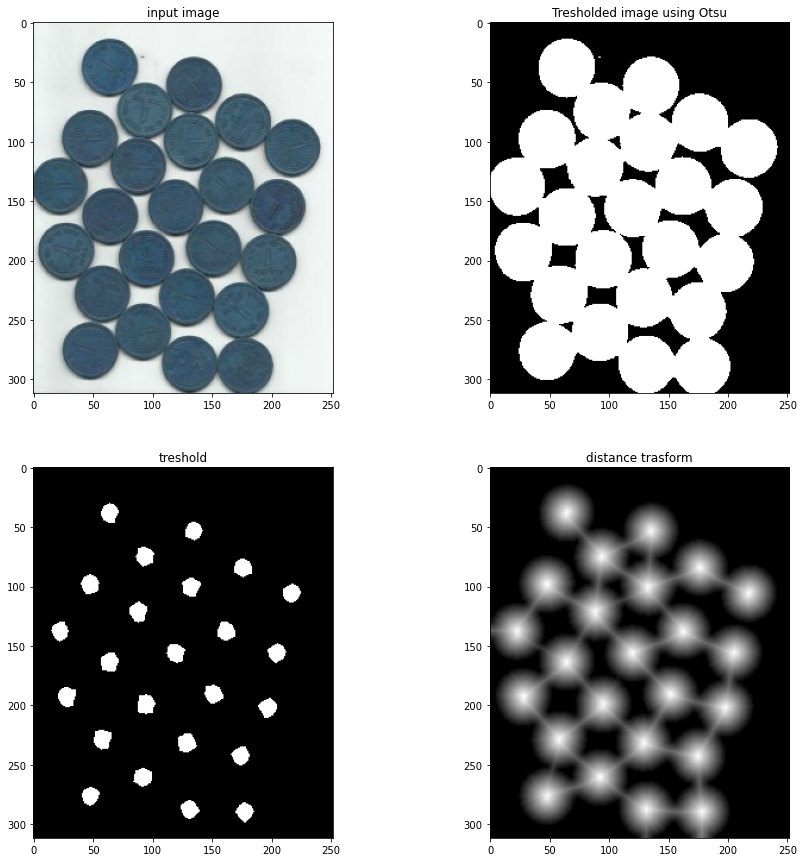

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../Figures/water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

fig= plt.figure(figsize=(15,15))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.set_title('input image')

ax2=fig.add_subplot(2,2,2)
ax2.imshow(thresh,cmap='gray')
ax2.set_title('Tresholded image using Otsu')

ax3=fig.add_subplot(2,2,3)
ax3.imshow(sure_fg,cmap='gray')
ax3.set_title('treshold')

ax3=fig.add_subplot(2,2,4)
ax3.imshow(dist_transform,cmap='gray')
ax3.set_title('distance trasform')



## Contour-Based Segmentation

### Chan-Vese Segmentation

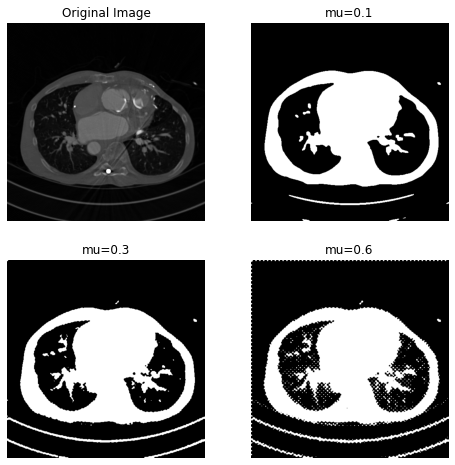

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese
import numpy as np
# Opening the image and converting it into grayscale
img = Image.open('../Figures/imageinverse_input.png').convert('L')
img = np.array(img)
cv1 = chan_vese(img, mu=0.1)
cv2 = chan_vese(img, mu=0.3)
cv3 = chan_vese(img, mu=0.6)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()
ax[0].imshow(img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)
ax[1].imshow(cv1, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("mu=0.1", fontsize=12)
ax[2].imshow(cv2, cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("mu=0.3", fontsize=12)
ax[3].imshow(cv3, cmap="gray")
ax[3].set_axis_off()
ax[3].set_title("mu=0.6", fontsize=12)
plt.show()

### __change picture__

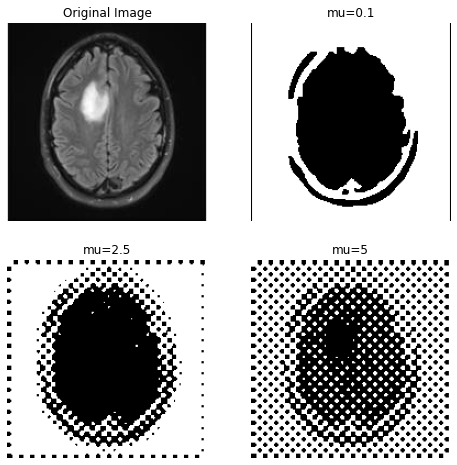

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese
import numpy as np
# Opening the image and converting it into grayscale
img = Image.open('../Figures/Brain.jpeg').convert('L')
img = np.array(img)
cv1 = chan_vese(img, mu=0.1)
cv2 = chan_vese(img, mu=2.5)
cv3 = chan_vese(img, mu=5)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()
ax[0].imshow(img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)
ax[1].imshow(cv1, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("mu=0.1", fontsize=12)
ax[2].imshow(cv2, cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("mu=2.5", fontsize=12)
ax[3].imshow(cv3, cmap="gray")
ax[3].set_axis_off()
ax[3].set_title("mu=5", fontsize=12)
plt.show()